## Equation of state (Energy versus volume) data for a solid

### Part 1
1. Read the data from file and create x and y data. The data file is http://physics.oregonstate.edu/~schneigu/ph464/eos/data.txt. 
2. Create a figure of your data. Label your axes. (x = volume, y = energy)
3. Perform a linear regression to a parabolic function using for example
    **numpy/polyfit** or **numpy.linalg.lstsq** and include the result in your graph.
    Extract the minimum and the curvature at the minimum from your linear regression.
    Plot the regression together with your data. Calculate and report $\chi^2$.
4. Observe the performance of your regression and think about the validity of  a quadratic approximation. Improve your linear regression by restricting your data to a subset of the data points (how many is reasonable?) around the minimum. Describe how you chose your data points and explain/justify your choice. Plot the regression together with your data. Calculate and report $\chi^2$. A quadratic approximation is called an harmonic equation of state.


### Part 2

5. Perform a nonlinear regression to the Murnaghan equation of state 

   \begin{equation} E(V)=E_0+K_0V_0\left(
    \frac{1}{K_0'(K_0'-1)}\left(\frac{V}{V_0}\right)^{1-K_0'} 
         +\frac{1}{K_0'}\frac{V}{V_0} -\frac{1}{K_0-1}
    \right)\end{equation} 
    
    This function has 4 parameters $E_0$, $V_0$, $K_0$ and $K_0'$, which are respectively the energy at the equilibrium volume, the  equilibrium volume (volume at minimum energy), the bulk modulus (the inverse of the compressibility)  and the pressure derivative of the compressibility.
    (wikipedia: https://en.wikipedia.org/wiki/Murnaghan_equation_of_state)
    
    Nonlinear regression is considerably more difficult to solve and we won't discuss the details of possible implemenations. Instead we will be using readily available implementations available in scientific libraries, for example **scipy.optimize.curve_fit** or **scipy.optimize.least_squares**.
    
    Unlike linear regression, in nonlinear regression a direct solution for the fit parameters is not available. Instead an iterative approach (usually Levenberg-Marquardt algorithm) is used. Iterative algorithms require *starting guesses* for the algorithm to converge to a solutions. Use initial guesses for $E_0$ and $V_0$ as determined from your parabolic fits. $K_0' \approx 3\dots4$ for typical solids. Experiment with initial guess for $K_0$ until you obtain a good fit. What is the $\chi^2$ for your final fit?
    
    Plot the regression together with your data  Calculate and report $\chi^2$.

6. Perform a nonlinear regression to the Birch equation of state 
    \begin{equation} E(V)=E_0+\frac{9V_0K_0}{16}\left(
    \left(\left(\frac{V_0}{V}\right)^\frac{2}{3} - 1
    \right)^3 K_0' +
    \left(\left(\frac{V_0}{V}\right)^\frac{2}{3} - 1
    \right)^2 
    \left(6-4\left(\frac{V_0}{V}\right)^\frac{2}{3} \right)
    \right)\end{equation} 
    This function has 4 parameters $E_0$, $V_0$, $K_0$ and $K_0'$, which are respectively the energy at the equilibrium volume, the  equilibrium volume (volume at minimum energy), the bulk modulus (the inverse of the compressibility)  and the pressure derivative of the compressibility.
    (wikipedia: https://en.wikipedia.org/wiki/Birch-Murnaghan_equation_of_state)
     Plot the regression together with your data  Calculate and report $\chi^2$.
    

### Summary: Your python notebook must contain 
* At the minimum 4 figures (steps 3,4,5 and 6)
* An explanation of your strategy of obtaining an improved quadratic regression in step 4. There is no one corrrect answer for this step.
* Calculated $\chi^2$ for all regressions.
* The complete code with comments to read the data and perform the regressions.
* The coordinates (energy, volume) of the energy minimum as a function of volume as determined by your regressions. For the Murnaghan and Birch equation of state these are the parameters $E_0$ and $V_0$.
* The curvature at the minimum as determined by your regression. For the Murnaghan and Birch equation of states this is the paramenter $K_0$.

### Due: TBA.

### Part 1 Attempt

In [5]:
import requests
import numpy as np 
import matplotlib.pyplot as plt 

In [36]:
link = 'http://physics.oregonstate.edu/~schneigu/ph464/eos/data.txt'
f = requests.get(link)
lines = f.text.split("\n")
e=[] ; v=[]
for line in lines:
    words= line.split()
    if len(words)>0:
        vv =float(words[0])
        ee =float(words[1])
        e.append(ee) ; v.append(vv)
#print(e)
#print(v)





The minimum point is ([6.74078153], [-9.14144943])


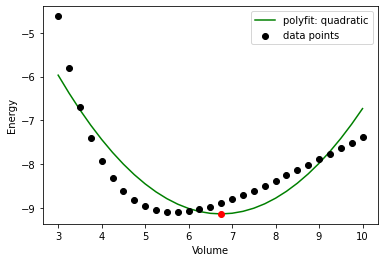

In [53]:
z = np.polyfit(v,e,2)
p = np.poly1d(z)

crit = p.deriv().r
r_crit = crit[crit.imag==0].real
test = p.deriv(2)(r_crit) 

x_min = r_crit[test>0]
y_min = p(x_min)

print(f"The minimum point is ({str(x_min)}, {str(y_min)})")
plt.plot(x_min, y_min, 'o', color = 'red', zorder = 2)
plt.plot(v, p(v), 'g', label = 'polyfit: quadratic', zorder = 1)
plt.scatter(v,e, color = 'black', label = 'data points', zorder = 2)
plt.xlabel('Volume')
plt.ylabel('Energy')
plt.legend()
plt.show()



